In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("CarListData.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [6]:
print(x)

[[    35  59000]
 [    37  60000]
 [    45  13000]
 [    27  14000]
 [    19  36000]
 [    27  21000]
 [    12  11000]
 [    32  92000]
 [     8 125000]
 [    23  21000]
 [    13 130000]]


In [7]:
print(y)

[1 1 1 1 0 0 0 1 1 0 1]


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
print(x_train)

[[    13 130000]
 [    12  11000]
 [    37  60000]
 [    32  92000]
 [     8 125000]
 [    27  14000]
 [    35  59000]
 [    27  21000]]


In [10]:
print(x_test)

[[   19 36000]
 [   23 21000]
 [   45 13000]]


In [11]:
print(y_train)

[1 0 1 1 1 1 1 0]


In [12]:
print(y_test)

[0 0 1]


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
print(x_train)

[[-1.02938759  1.47304549]
 [-1.12404392 -1.18290017]
 [ 1.24236433 -0.08927548]
 [ 0.76908268  0.62492839]
 [-1.50266924  1.36145113]
 [ 0.29580103 -1.11594355]
 [ 1.05305167 -0.11159436]
 [ 0.29580103 -0.95971146]]


In [17]:
print(x_test)

[[-0.46144961 -0.62492839]
 [-0.08282429 -0.95971146]
 [ 1.99961497 -1.13826242]]


In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [24]:
y_pred = classifier.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


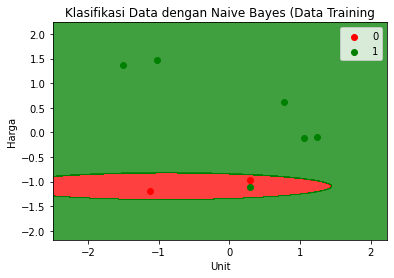

In [34]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training')
plt.xlabel('Unit')
plt.ylabel('Harga')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


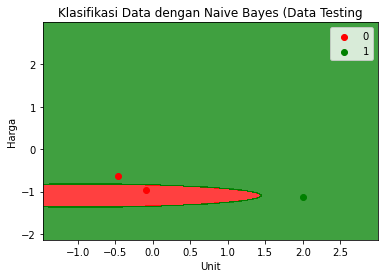

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing')
plt.xlabel('Unit')
plt.ylabel('Harga')
plt.legend()
plt.show()